In [2]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

import networkx as nx

%matplotlib inline

In [8]:
G = nx.DiGraph()

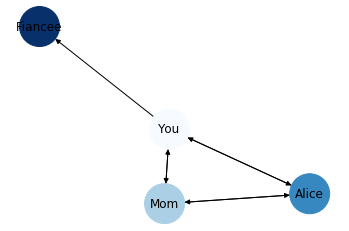

In [10]:
#Adding nodes.  We could have added them all in one list using .add_nodes_from()
G.add_node('You')
G.add_node('Mom')
G.add_node('Alice')
G.add_node('Fiancee')

#Adding edges.  You can also add them individually using .add_edge() 
G.add_edges_from([('You','Mom'),('You','Fiancee')])
G.add_edges_from([('Mom','You'),('Mom','Alice')])
G.add_edges_from([('Alice','Mom'),('Alice','You'), ('You', 'Alice')])


#Drawing the graph
nx.draw_networkx(G,
                 pos=nx.spring_layout(G), # Positions the nodes relative to each other
                 node_size=1600, 
                 cmap=plt.cm.Blues, # The color palette to use to color the nodes.
                 node_color=range(len(G)) #The number of shades of color to use.
                 )
plt.axis("off")
plt.show()

In [11]:
G.degree()

DiDegreeView({'You': 5, 'Mom': 4, 'Alice': 4, 'Fiancee': 1})

In [14]:
G.number_of_nodes(), G.number_of_edges()

(4, 7)

In [15]:
G.edges()

OutEdgeView([('You', 'Mom'), ('You', 'Fiancee'), ('You', 'Alice'), ('Mom', 'You'), ('Mom', 'Alice'), ('Alice', 'Mom'), ('Alice', 'You')])

In [16]:
nx.betweenness_centrality(G)

{'You': 0.3333333333333333, 'Mom': 0.0, 'Alice': 0.0, 'Fiancee': 0.0}

In [34]:
print("Simple paths:",nx.all_pairs_node_connectivity(G),'\n')

Simple paths: {'You': {'Mom': 2, 'Alice': 2, 'Fiancee': 1}, 'Mom': {'You': 2, 'Alice': 2, 'Fiancee': 1}, 'Alice': {'You': 2, 'Mom': 2, 'Fiancee': 1}, 'Fiancee': {'You': 0, 'Mom': 0, 'Alice': 0}} 



In [36]:
for p in nx.all_pairs_shortest_path(G):
    print(p)

('You', {'You': ['You'], 'Mom': ['You', 'Mom'], 'Fiancee': ['You', 'Fiancee'], 'Alice': ['You', 'Alice']})
('Mom', {'Mom': ['Mom'], 'You': ['Mom', 'You'], 'Alice': ['Mom', 'Alice'], 'Fiancee': ['Mom', 'You', 'Fiancee']})
('Alice', {'Alice': ['Alice'], 'Mom': ['Alice', 'Mom'], 'You': ['Alice', 'You'], 'Fiancee': ['Alice', 'You', 'Fiancee']})
('Fiancee', {'Fiancee': ['Fiancee']})
